<a href="https://colab.research.google.com/github/uvindu827/crop_yield_predictor/blob/dev/CYP_project_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Identifying the dataset

- load the dataset to the colab environment
- usinng head() to display top 5 rows

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CYP_proj/crop_yield_dataset.csv')

df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,NaN,Cotton,897.077239,27.676966,False,True,Cloudy,122.0,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140.0,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,NaN,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146.0,6.517573
4,South,NaN,Wheat,730.379174,31.620687,True,True,Cloudy,110.0,7.248251


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999997 entries, 0 to 999996
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  949997 non-null  object 
 1   Soil_Type               919997 non-null  object 
 2   Crop                    919997 non-null  object 
 3   Rainfall_mm             919997 non-null  float64
 4   Temperature_Celsius     919997 non-null  float64
 5   Fertilizer_Used         969997 non-null  object 
 6   Irrigation_Used         949997 non-null  object 
 7   Weather_Condition       919997 non-null  object 
 8   Days_to_Harvest         919997 non-null  float64
 9   Yield_tons_per_hectare  989997 non-null  float64
dtypes: float64(4), object(6)
memory usage: 76.3+ MB


- info() method is used to identify the columns in the dataset

**conclusions**
- there are 999997 observations in the dataset and each column is having null values
- there are 4 numerical columns and 6 categorical columns

In [ ]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,919997.000000,919997.000000,919997.000000,989997.000000
mean,549.916780,27.507275,104.494332,4.649645
std,259.831769,7.218737,25.960264,1.696480
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891776,21.260040,82.000000,3.417657
50%,550.112524,27.510362,104.000000,4.652081
75%,774.479420,33.753983,127.000000,5.879576
max,999.998098,39.999997,149.000000,9.963372


- use describe() method to describe numerical columns

**conclusions**
- Yield_tons_per_hectare column minimum vallue is a negative value. there is data innconsistency

In [ ]:
print(df.isnull().sum())

Region                    50000
Soil_Type                 80000
Crop                      80000
Rainfall_mm               80000
Temperature_Celsius       80000
Fertilizer_Used           30000
Irrigation_Used           50000
Weather_Condition         80000
Days_to_Harvest           80000
Yield_tons_per_hectare    10000
dtype: int64


- displayed number of null values in each column

In [ ]:
for col in df.columns:
  uniq_vals = df[col].unique()
  print(f"\ncolumn: {col}: {len(uniq_vals)}")
  print(uniq_vals)


column: Region: 5
['West' 'South' 'North' 'East' nan]

column: Soil_Type: 7
[nan 'Clay' 'Loam' 'Sandy' 'Silt' 'Peaty' 'Chalky']

column: Crop: 7
['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' nan 'Maize']

column: Rainfall_mm: 919998
[897.07723911 992.67328162 147.99802529 ... 867.36204622 492.81285654
 180.93618014]

column: Temperature_Celsius: 919998
[27.67696637 18.02614225 29.79404242 ... 39.66103885 33.04550506
 27.29884735]

column: Fertilizer_Used: 3
[False True nan]

column: Irrigation_Used: 3
[True False nan]

column: Weather_Condition: 4
['Cloudy' 'Rainy' 'Sunny' nan]

column: Days_to_Harvest: 91
[122. 140.  nan 146. 110.  74.  90.  61. 127.  73. 141. 136. 134.  77.
 115.  68.  95.  93.  76.  99.  71. 100. 121. 133. 142.  67. 130.  83.
  94.  63.  98.  66. 145. 148. 132. 109. 139.  82.  64.  96. 131.  75.
 126. 118.  72.  70. 138.  80. 103.  60. 137. 111. 147. 128.  89. 125.
  62.  69. 102. 124. 149. 123. 114. 106. 116.  65.  88.  87. 107. 119.
  84. 105. 144.  78.  97.  86. 1

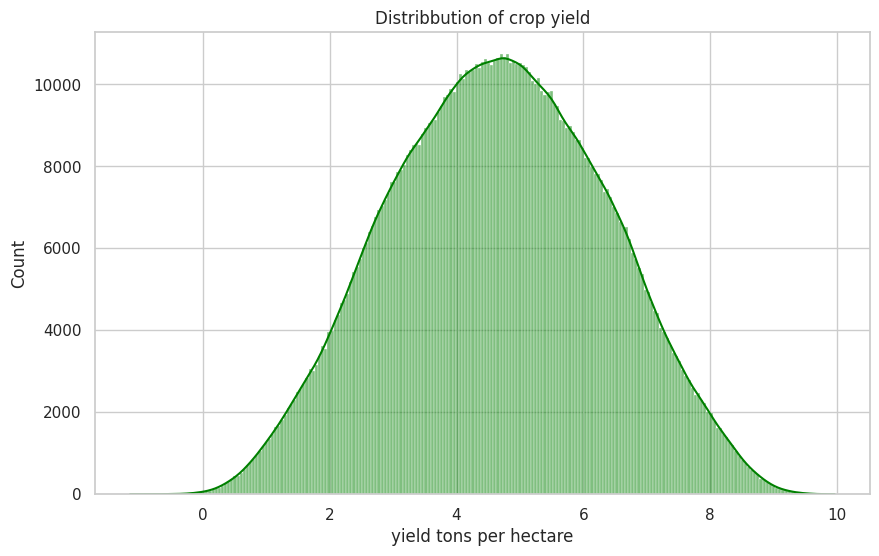

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, color='green')
plt.title('Distribbution of crop yield')
plt.xlabel('yield tons per hectare')
plt.show()

- identify the distribution of the target variable

**conclusions**

-target variable has a bell cuurved distribution without skews.

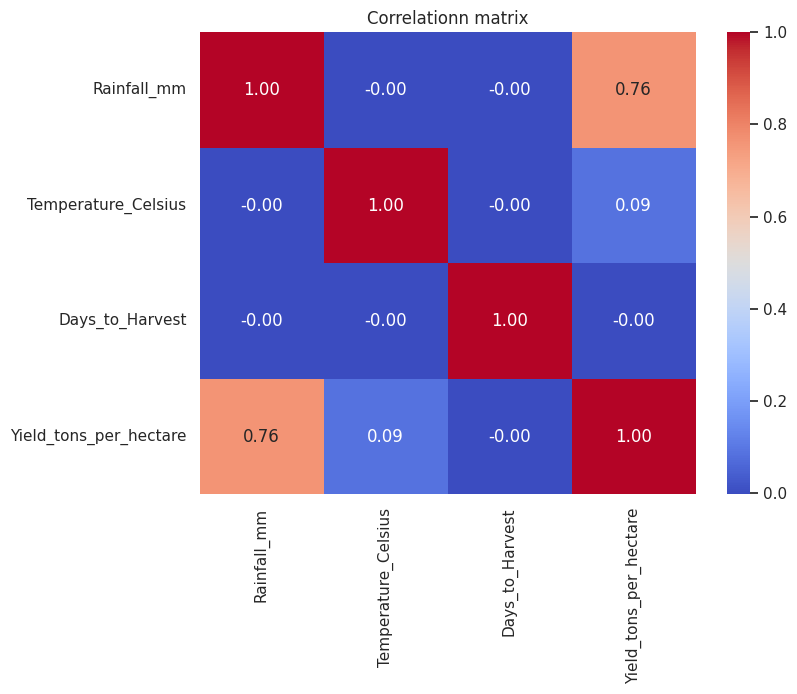

In [ ]:
numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.title('Correlationn matrix')
plt.show()

- build a correlation matrix to identify the relationships between numerical attributes and target variable.

**conclusion**

- rainfall is having a stronng relationship while other lacks strong relationships.

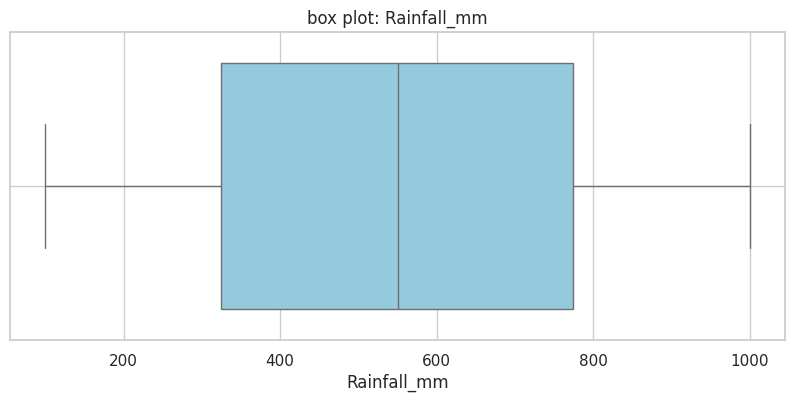

__________________________________________________


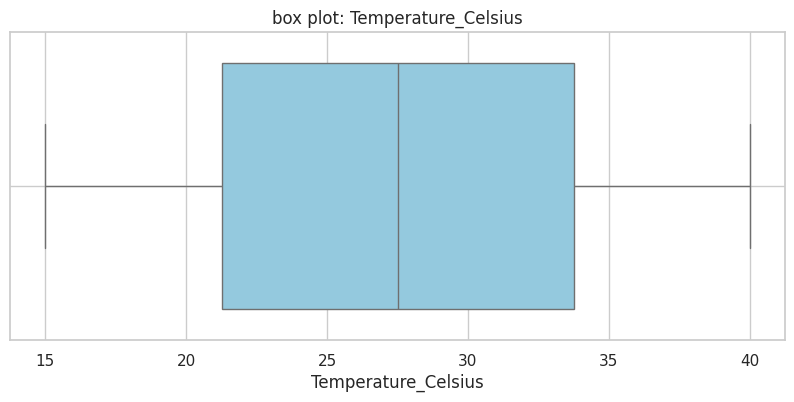

__________________________________________________


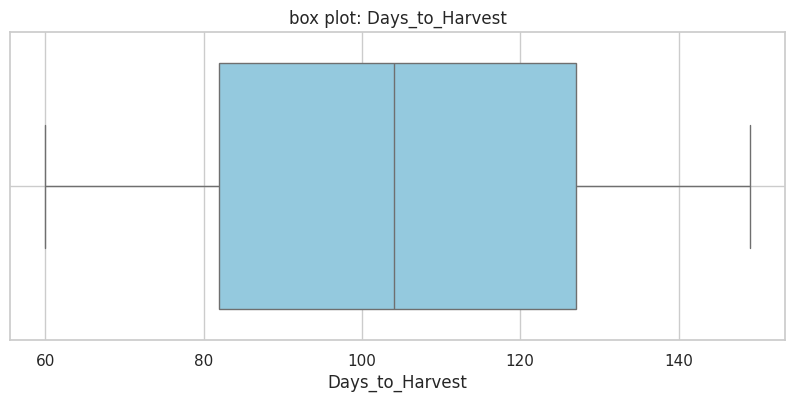

__________________________________________________


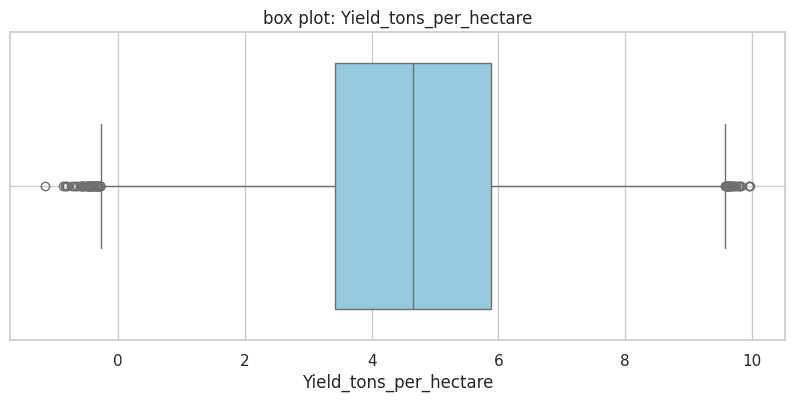

__________________________________________________


In [ ]:

for cols in numeric_cols:
  plt.figure(figsize=(10,4))
  sns.boxplot(data=df, x=cols, color='skyblue')
  plt.title(f'box plot: {cols}')
  plt.grid(axis='y')
  plt.show()

  print("_" * 50)

- outliers can be seen in target variable and other attributes arent havinng outliers.

#Preprocessing

In [ ]:
df_clean = df[df['Yield_tons_per_hectare'] >= 0].copy()

print(f"Original row count: {len(df)}")
print(f"Cleaned row count: {len(df_clean)}")

Original row count: 999997
Cleaned row count: 989768


- cleaned the negative values of the target variable.

In [ ]:
from sklearn.model_selection import train_test_split

x = df_clean.drop('Yield_tons_per_hectare', axis=1)
y = df_clean['Yield_tons_per_hectare']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training shape: {x_train.shape}")
print(f"Testing shape: {x_test.shape}")

Training shape: (791814, 9)
Testing shape: (197954, 9)


- split training and testinng sets to ratio 80:20

In [ ]:
from sklearn.impute import SimpleImputer

num_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
cat_cols = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

x_train[num_cols] = num_imputer.fit_transform(x_train[num_cols])
x_test[num_cols] = num_imputer.fit_transform(x_test[num_cols])

x_train[cat_cols] = cat_imputer.fit_transform(x_train[cat_cols])
x_test[cat_cols] = cat_imputer.fit_transform(x_test[cat_cols])

print("\nTrain set:", x_train.isnull().sum())
print("\nTest set:", x_test.isnull().sum())
print("\ntarget set:", y_train.isnull().sum())
print("\ntarget set:", y_test.isnull().sum())



Train set: Region                 0
Soil_Type              0
Crop                   0
Rainfall_mm            0
Temperature_Celsius    0
Fertilizer_Used        0
Irrigation_Used        0
Weather_Condition      0
Days_to_Harvest        0
dtype: int64

Test set: Region                 0
Soil_Type              0
Crop                   0
Rainfall_mm            0
Temperature_Celsius    0
Fertilizer_Used        0
Irrigation_Used        0
Weather_Condition      0
Days_to_Harvest        0
dtype: int64

target set: 0

target set: 0


- filled null values of the numerical variables in input variables with mean because no outliers found in thise distributions
- filled null values oof the categorical columns in input variables with mode.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_train_encoded = encoder.fit_transform(x_train[cat_cols])
x_test_encoded = encoder.transform(x_test[cat_cols])

encoded_feature_names = encoder.get_feature_names_out(cat_cols)

x_train_cat_df = pd.DataFrame(x_train_encoded, columns=encoded_feature_names, index=x_train.index)
x_test_cat_df = pd.DataFrame(x_test_encoded, columns=encoded_feature_names, index=x_test.index)

x_train_final = pd.concat([x_train.drop(cat_cols, axis=1), x_train_cat_df], axis=1)
x_test_final = pd.concat([x_test.drop(cat_cols, axis=1),  x_test_cat_df], axis=1)

print("x train head:")
display(x_train_final.head())

print("x test head:")
display(x_test_final.head())

x train head:


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
923633,681.065009,27.509376,91.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
376597,772.393440,15.067604,104.497902,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
10744,953.998198,18.640026,87.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
355913,176.280560,38.197730,144.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
257428,603.120374,16.172085,113.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


x test head:


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,...,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
625502,867.248522,22.604752,95.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
313262,309.311049,31.557267,125.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
455686,661.820066,20.601222,82.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
574827,472.084418,33.325984,104.487956,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
695073,515.108547,38.768763,103.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


- one-hot encodedd the categorical columns and then concatenated them with numerical columns

#Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_model = LinearRegression(n_jobs=-1)

print("Model training in progress...")
lr_model.fit(x_train_final, y_train)

y_pred = lr_model.predict(x_test_final)
print(y_pred[:10])


Model training in progress...
[6.29956276 3.69311293 3.78397252 4.54091462 3.41320891 4.99093307
 2.90838403 5.04762982 1.66396405 4.60371616]


#Model evaluation

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print("_____Linear regression model evaluation_____")
print(f"RMSE: {rmse:.4f} tons/hectares")
print(f"R2 score: {r2:.4f}")

_____Linear regression model evaluation_____
RMSE: 0.6756 tons/hectares
R2 score: 0.8405
